In [ ]:
import tensorflow as tf
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fashion_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv', sep = ',')

In [ ]:
# 784 indicates 28x28 pixels and 1 coloumn for the label
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
fashion_test_df.shape

(10000, 785)

In [ ]:
#create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [ ]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

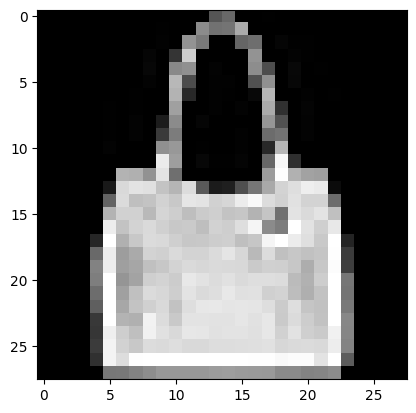

In [ ]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

In [ ]:
label = training[i,0]
label

8.0

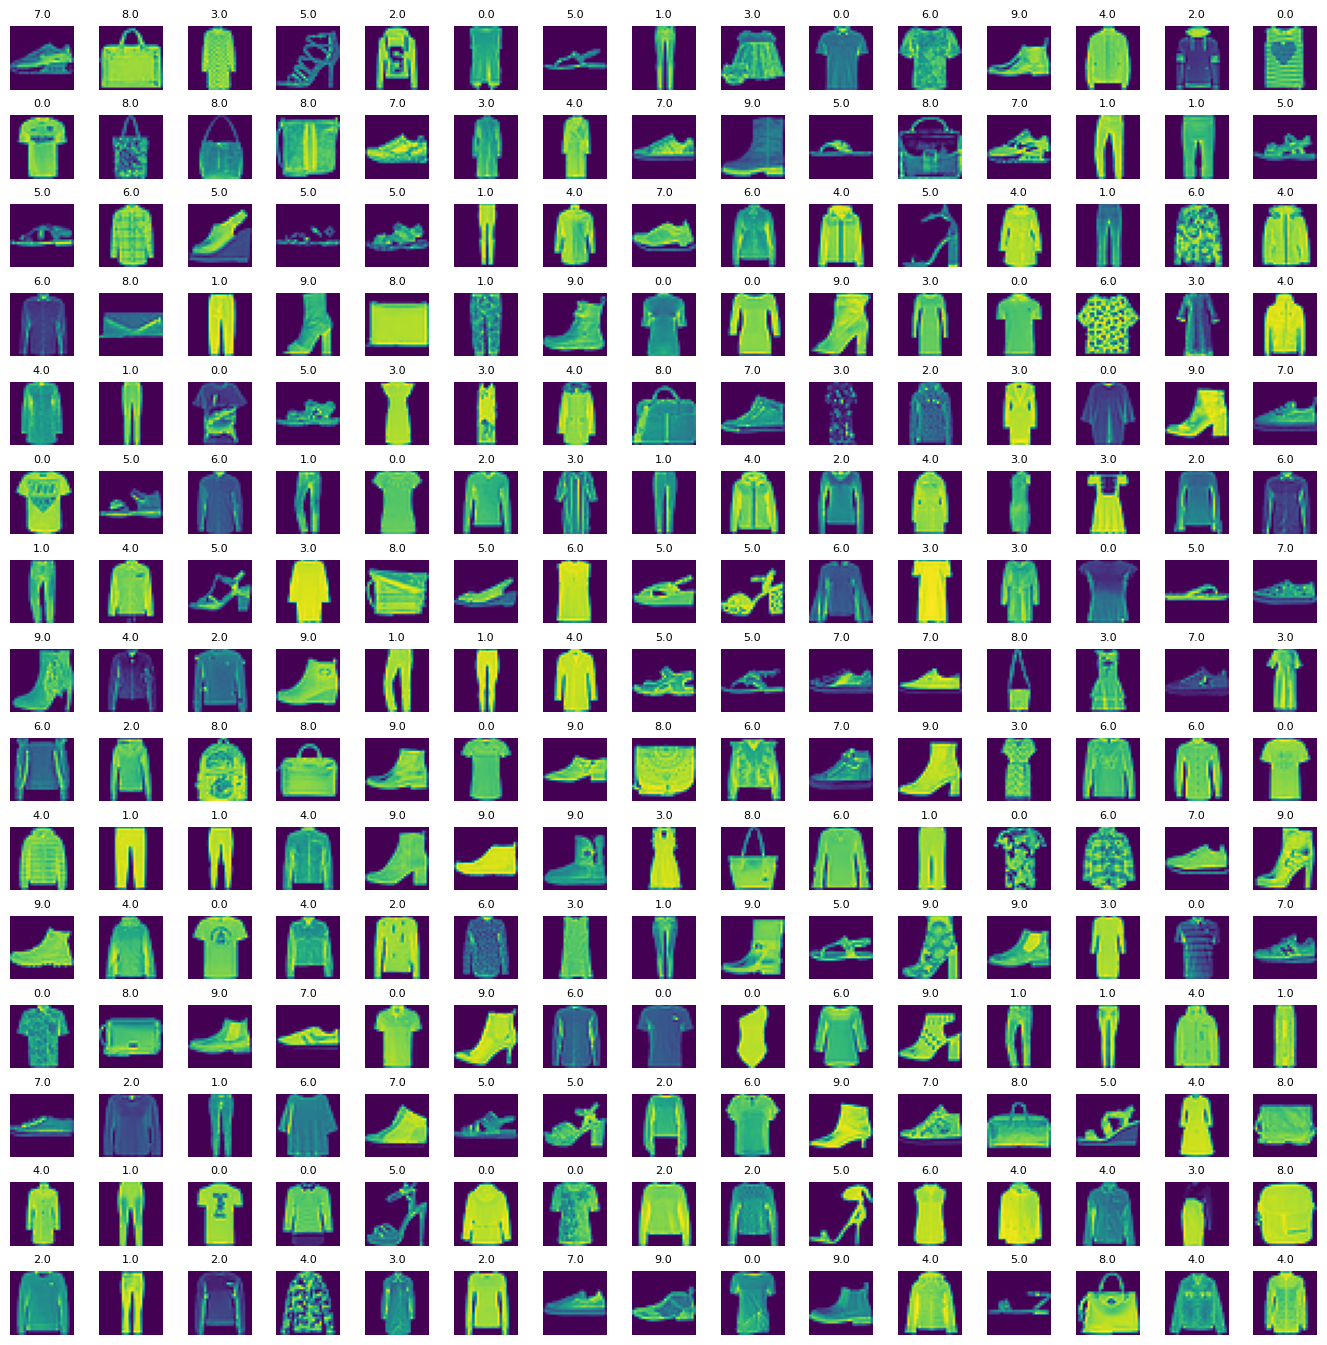

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

<h2><b>Build a Neural Network

In [ ]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [ ]:
epochs = 5
history = cnn.fit(X_train,
                  y_train,
                  batch_size = 512,
                  epochs = epochs,
                  verbose = 1)

Epoch 1/5
118/118 [==============================] - 53s 435ms/step - loss: 0.8830 - accuracy: 0.6819
Epoch 2/5
118/118 [==============================] - 55s 467ms/step - loss: 0.4962 - accuracy: 0.8172
Epoch 3/5
118/118 [==============================] - 51s 434ms/step - loss: 0.4195 - accuracy: 0.8508
Epoch 4/5
118/118 [==============================] - 53s 450ms/step - loss: 0.3760 - accuracy: 0.8666
Epoch 5/5
118/118 [==============================] - 64s 543ms/step - loss: 0.3519 - accuracy: 0.8750


In [ ]:
evaluation = cnn.evaluate(X_test, y_test)
#print('Test Accuracy : {:.3f}'.format(evaluation[1]))
evaluation

313/313 [==============================] - 3s 9ms/step - loss: 0.3293 - accuracy: 0.8806


[0.32930171489715576, 0.8805999755859375]

In [ ]:
# get the predictions for the test data
#predicted_classes = cnn.predict_classes(X_test)
predict_x=cnn.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
predicted_classes = classes_x


313/313 [==============================] - 4s 12ms/step


In [ ]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 6])

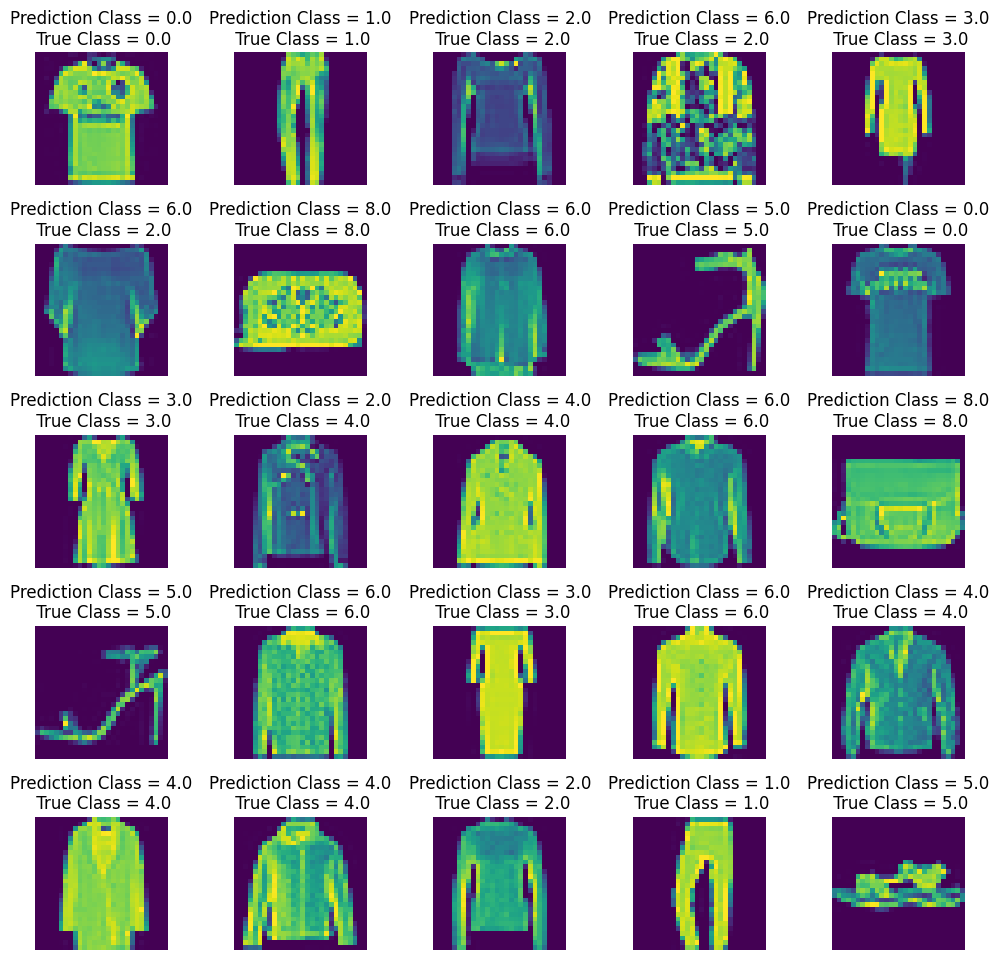

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.82      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.88      0.77      0.82      1000
     Class 3       0.88      0.93      0.90      1000
     Class 4       0.84      0.78      0.81      1000
     Class 5       0.97      0.96      0.96      1000
     Class 6       0.63      0.72      0.68      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<h2>Model Exporting and Serving

In [ ]:
# Let's obtain a temporary storage directory
MODEL_DIR = tempfile.gettempdir()

In [ ]:
MODEL_DIR

'/tmp'

In [ ]:
# Let's specify the model version, choose #1 for now
version = 1

In [ ]:
# Let's join the temp model directory with our chosen version number
# The expected result will be = '\tmp\version number'
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [ ]:
# Let's save the model using simple_save
# If the directory already exists, we will remove it using '!rm'
# rm removes each file specified on the command line.

if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.keras.models.save_model(
    cnn,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)



In [ ]:
!ls -l {export_path}

total 184
drwxr-xr-x 2 root root   4096 Sep 14 09:09 assets
-rw-r--r-- 1 root root     58 Sep 14 09:09 fingerprint.pb
-rw-r--r-- 1 root root  18812 Sep 14 09:09 keras_metadata.pb
-rw-r--r-- 1 root root 153174 Sep 14 09:09 saved_model.pb
drwxr-xr-x 2 root root   4096 Sep 14 09:09 variables


In [ ]:
# Now we can view our saved model
!saved_model_cli show --dir {export_path} --all

2023-09-14 09:09:18.760520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predi

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   6078      0 --:--:-- --:--:-- --:--:--  6093
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 438 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.13.0 [438 MB]
Fetched 438 MB in 10s (42.4 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.13.0_all.deb ...
Unpacking tensorflow-model-server (2.13.0) ...
Setting up tensorflow-model-server (2.13.0) ...


In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=shreedhar1 \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
def show(idx, title):
  plt.figure()
  plt.imshow(X_test[idx].reshape(28,28))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})


In [ ]:
y_test = y_test.astype(int)
y_test.dtype

dtype('int64')

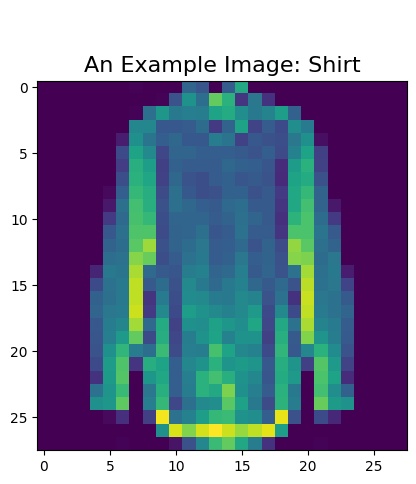

In [ ]:
import random
rando = random.randint(0,len(X_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))

In [ ]:
# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 468], [0.12156862765550613], [0.0], [0.0], [0.0]]]]}


In [ ]:
!pip install -q requests
import requests

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/shreedhar1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

In [ ]:
y_test

array([0, 1, 2, ..., 8, 8, 1])

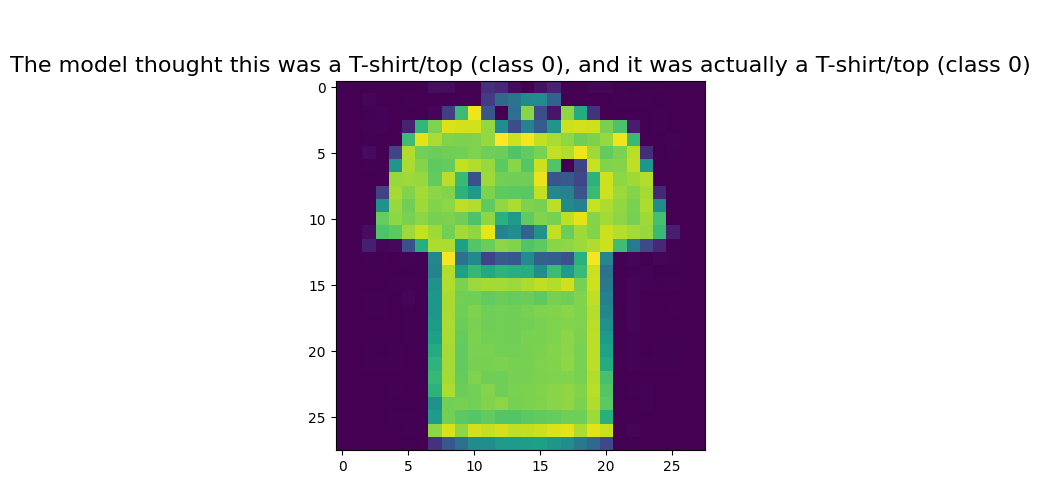

In [ ]:
show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], y_test[0], class_names[np.argmax(predictions[0])], y_test[0]))

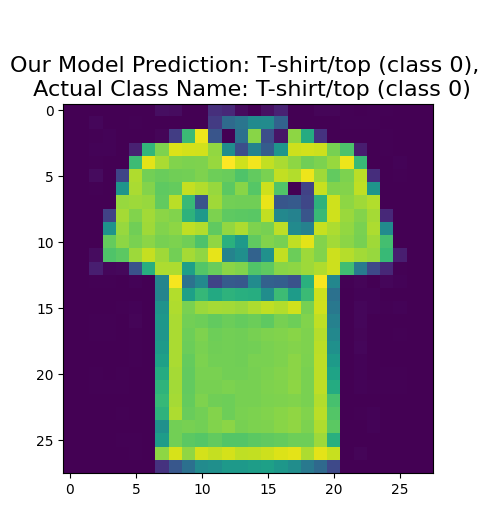

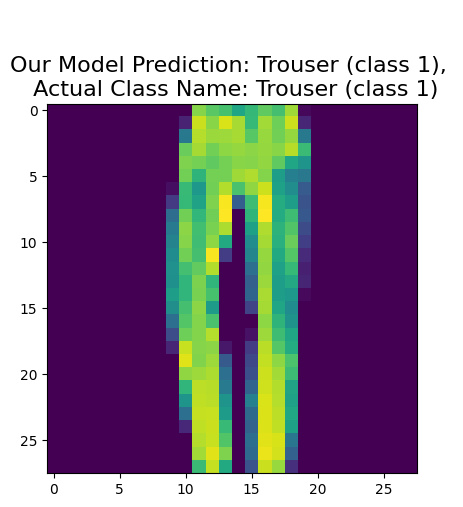

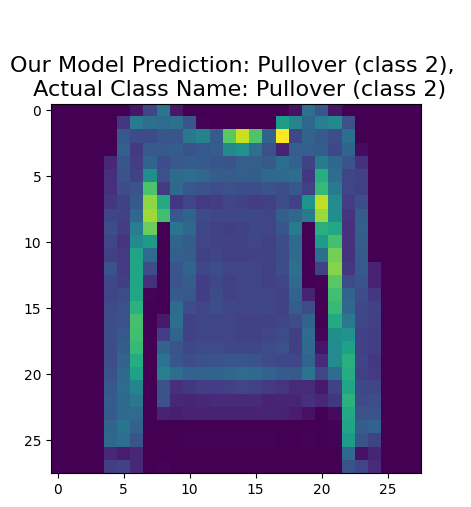

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/shreedhar1/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'Our Model Prediction: {} (class {}), \n Actual Class Name: {} (class {})'.format(
    class_names[np.argmax(predictions[i])], y_test[i], class_names[np.argmax(predictions[i])], y_test[i]))